<a href="https://colab.research.google.com/github/KumudaBG/DeepLearning-Assignment3/blob/main/b2_pytorch_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [1]:
!python --version

Python 3.7.10


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [3]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [4]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### 3-dimensional inputs , 2-D output

In [5]:
import torch
import torch.nn as nn

n = 270
d = 3
x = torch.FloatTensor(n, d).uniform_(-1, 1)
weights_true = torch.tensor([[5,1,2],[2,2,1]]).float()
weights_true = torch.transpose(weights_true,0,1)
bias_true= torch.tensor([2,1])
y_true = (x ** 2) @ weights_true+ x @ weights_true + bias_true.T
print(f'y: {y_true.shape}')
print(y_true)

y: torch.Size([270, 2])
tensor([[ 2.6458e+00,  1.5856e+00],
        [ 6.7231e+00,  2.4405e+00],
        [ 3.8897e+00,  4.6191e+00],
        [ 9.2635e+00,  6.0336e+00],
        [ 1.4370e+00,  7.9495e-01],
        [ 2.5407e+00,  1.0099e+00],
        [ 2.0791e+00,  2.7392e+00],
        [ 5.3477e-01,  2.2263e-01],
        [ 5.0402e+00,  2.5989e+00],
        [ 2.4894e+00,  3.4708e+00],
        [ 4.7502e+00,  1.9538e+00],
        [ 4.3283e+00,  1.9105e+00],
        [ 6.7272e+00,  2.6835e+00],
        [ 1.1977e+01,  7.0201e+00],
        [ 4.4827e+00,  4.7006e+00],
        [ 4.5501e+00,  2.4332e+00],
        [ 3.2694e+00,  4.3421e+00],
        [ 4.0889e+00,  1.7482e+00],
        [ 3.9695e+00,  1.7973e+00],
        [ 1.0416e+00,  2.5892e-01],
        [ 1.2276e-01, -2.0005e-01],
        [ 2.5592e+00,  4.3759e+00],
        [ 1.2784e+01,  5.0301e+00],
        [ 5.9059e+00,  4.3895e+00],
        [ 1.4573e+00,  1.1166e+00],
        [ 3.2536e+00,  1.1720e+00],
        [ 2.6944e-01,  1.3476e-02],
    

#Visualization

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
def plot_3d(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()

In [7]:
import plotly.graph_objects as pltgo
def plot_go_3d(x, y, y_pred=None):
  
  fig = pltgo.Figure()
  fig.add_trace(pltgo.Scatter3d(x = x[:,0], y = x[:,1], z = y.reshape([-1]),
                    name='y_true', mode='markers', marker=dict( size=10, color='dodgerblue', colorscale='Viridis', opacity=0.5)))
  if y_pred is not None:
    fig.add_trace(pltgo.Scatter3d(x = x[:,0], y = x[:,1], z = y_pred.reshape([-1]),
                   name='y_pred', mode='markers', marker=dict( size=10, color='goldenrod', colorscale='Viridis', opacity=0.5)))
  fig.update_layout(margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [8]:
X = TSNE(n_components=2).fit_transform(x)
Y = TSNE(n_components=1).fit_transform(y_true)
plot_go_3d(X,Y)

#Model

Initialisation and forward call methods. The inbuild Loss and ReLU activation function is used

In [9]:
class Linear(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super(Linear, self).__init__()
    self.init = torch.rand(input_dim, num_hidden).float()
    self.weights = torch.nn.Parameter(self.init, requires_grad=True)
    self.bias = torch.zeros(num_hidden,)
  
  def __call__(self, x):
    self.x = x
    return torch.mm(x, self.weights) + self.bias

In [10]:
import torch
import torch.nn as nn
from typing import Callable

class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super(TorchModel, self).__init__()
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.linear2 = Linear(num_hidden, 12)
    self.relu2 = nn.ReLU()
    self.linear3 = Linear(12, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(40.1177, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [11]:
from typing import Callable
import pdb

def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  # pdb.set_trace()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad() 
    y_pred_tensor = model(x) 
    loss_value = loss(y_pred_tensor, y) 
    if epoch % 50 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward() 
    optimizer.step() 

loss = nn.MSELoss()

model = TorchModel(d, 22)
torch_fit(x, y_true, model=model, loss=loss, lr=0.0035, num_epochs=1000)

Epoch 0, loss 314.4158020019531
Epoch 50, loss 3.8080332279205322
Epoch 100, loss 2.3850250244140625
Epoch 150, loss 1.461271047592163
Epoch 200, loss 0.9192767143249512
Epoch 250, loss 0.6170015931129456
Epoch 300, loss 0.44624391198158264
Epoch 350, loss 0.34509870409965515
Epoch 400, loss 0.2819240093231201
Epoch 450, loss 0.24024951457977295
Epoch 500, loss 0.211158886551857
Epoch 550, loss 0.18992826342582703
Epoch 600, loss 0.17382657527923584
Epoch 650, loss 0.16134653985500336
Epoch 700, loss 0.15143795311450958
Epoch 750, loss 0.1432989090681076
Epoch 800, loss 0.13655905425548553
Epoch 850, loss 0.13095225393772125
Epoch 900, loss 0.12617318332195282
Epoch 950, loss 0.12204913049936295


In [12]:
from typing import Callable
import pdb

def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(x, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss_value.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

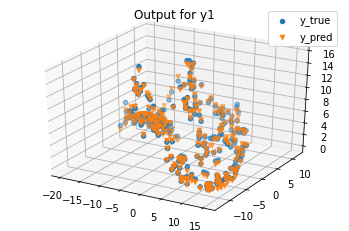

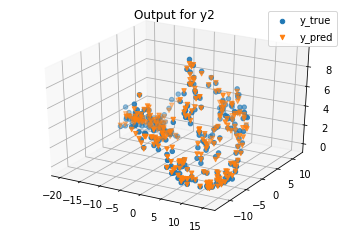

In [13]:
y_pred=model(x).detach().numpy()
plot_3d('Output for y1', x, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2', x, y_true[:,1], y_pred[:,1])

In [14]:
X_plot = TSNE(n_components=2).fit_transform(x)
y_true_plot = TSNE(n_components=1).fit_transform(y_true)
y_pred_plot = TSNE(n_components=1).fit_transform(y_pred)
plot_go_3d(X_plot,y_true_plot,y_pred_plot)